# E.coli reconstruction

To construct a metabolic model for E. coli K-12, we first import the MetaCyc database into moped from its PGDB files.

In [1]:
from __future__ import annotations

from math import pi
from pathlib import Path

import cobra
import matplotlib.pyplot as plt
import pandas as pd
import pkg_resources
from cobra.flux_analysis import pfba
from matplotlib.figure import Figure
from moped import Model, Reaction

print(pkg_resources.get_distribution("moped").version)


1.10.0


In [2]:
moped = Model()
moped.read_from_sbml(Path("..") / "generated" / "models" / "ecoli.xml")

iml = Model()
iml.read_from_sbml(Path("..") / "data" / "models" / "iML1515.xml")

carveme = Model()
carveme.read_from_sbml(Path("..") / "data" / "carveme" / "ecoli.xml")


Scaling...
 A: min|aij| =  1.000e+00  max|aij| =  1.000e+00  ratio =  1.000e+00
Problem data seem to be well scaled


In [3]:
AA_moped = {
    "TRP_c": -0.055234,
    "GLT_c": -0.255712,
    "LEU_c": -0.437778,
    "ASN_c": -0.234232,
    "L-ASPARTATE_c": -0.234232,
    "L-ALPHA-ALANINE_c": -0.499149,
    "ARG_c": -0.28742,
    "TYR_c": -0.133993,
    "THR_c": -0.246506,
    "SER_c": -0.209684,
    "GLN_c": -0.255712,
    "MET_c": -0.149336,
    "LYS_c": -0.333448,
    "CYS_c": -0.088988,
    "HIS_c": -0.092056,
    "VAL_c": -0.411184,
    "ILE_c": -0.282306,
    "PRO_c": -0.214798,
    "PHE_c": -0.180021,
    "GLY_c": -0.595297,
}

DNA_moped = {
    "GTP_c": -0.209121,
    "UTP_c": -0.140101,
    "CTP_c": -0.129799,
    "ATP_c": -0.1699,
}

lipid_moped = {
    "MALONYL-COA_c": -3.1e-05,
    "ACETYL-COA_c": -0.000279,
}

AA_bigg = {
    "trp__L_c": -0.055234,
    "glu__L_c": -0.255712,
    "leu__L_c": -0.437778,
    "asn__L_c": -0.234232,
    "asp__L_c": -0.234232,
    "ala__L_c": -0.499149,
    "arg__L_c": -0.28742,
    "tyr__L_c": -0.133993,
    "thr__L_c": -0.246506,
    "ser__L_c": -0.209684,
    "gln__L_c": -0.255712,
    "met__L_c": -0.149336,
    "lys__L_c": -0.333448,
    "cys__L_c": -0.088988,
    "his__L_c": -0.092056,
    "val__L_c": -0.411184,
    "ile__L_c": -0.282306,
    "pro__L_c": -0.214798,
    "phe__L_c": -0.180021,
    "gly_c": -0.595297,
}

DNA_bigg = {
    "gtp_c": -0.209121,
    "utp_c": -0.140101,
    "ctp_c": -0.129799,
    "atp_c": -0.1699,
}

lipid_bigg = {
    "malcoa_c": -3.1e-05,
    "accoa_c": -0.000279,
}


new_bm = {
    "trp__L_c": -0.055234,
    "glu__L_c": -0.255712,
    "malcoa_c": -3.1e-05,
    "gtp_c": -0.209121,
    "nadp_c": -0.000112,
    "h2o_c": -48.752916,
    "leu__L_c": -0.437778,
    "asn__L_c": -0.234232,
    "asp__L_c": -0.234232,
    "ala__L_c": -0.499149,
    "arg__L_c": -0.28742,
    "tyr__L_c": -0.133993,
    "thr__L_c": -0.246506,
    "ctp_c": -0.129799,
    "ser__L_c": -0.209684,
    "atp_c": -54.119975,
    "gln__L_c": -0.255712,
    "met__L_c": -0.149336,
    "lys__L_c": -0.333448,
    "accoa_c": -0.000279,
    "cys__L_c": -0.088988,
    "his__L_c": -0.092056,
    "val__L_c": -0.411184,
    "utp_c": -0.140101,
    "ile__L_c": -0.282306,
    "nadph_c": -0.000335,
    "nad_c": -0.001787,
    "pro__L_c": -0.214798,
    "phe__L_c": -0.180021,
    "gly_c": -0.595297,
    "pi_c": 53.945874,
    "h_c": 51.472,
    "adp_c": 53.95,
}


In [4]:
AA_moped_reaction = Reaction(
    id="AA_BM",
    stoichiometries=AA_moped,
    bounds=(0.0, 1000.0),
)

DNA_moped_reaction = Reaction(
    id="DNA_BM",
    stoichiometries=DNA_moped,
    bounds=(0.0, 1000.0),
)

lipid_moped_reaction = Reaction(
    id="lipid_BM",
    stoichiometries=lipid_moped,
    bounds=(0.0, 1000.0),
)

AA_bigg_reaction = Reaction(
    id="AA_BM",
    stoichiometries=AA_bigg,
    bounds=(0.0, 1000.0),
)

DNA_bigg_reaction = Reaction(
    id="DNA_BM",
    stoichiometries=DNA_bigg,
    bounds=(0.0, 1000.0),
)

lipid_bigg_reaction = Reaction(
    id="lipid_BM",
    stoichiometries=lipid_bigg,
    bounds=(0.0, 1000.0),
)
new_biomass_rxn = Reaction(
    id="BM_NEW",
    stoichiometries=new_bm,
    bounds=(0.0, 1000.0),
)

iml.add_reaction(new_biomass_rxn)
carveme.add_reaction(new_biomass_rxn)

iml.add_reaction(AA_bigg_reaction)
iml.add_reaction(DNA_bigg_reaction)
iml.add_reaction(lipid_bigg_reaction)

carveme.add_reaction(AA_bigg_reaction)
carveme.add_reaction(DNA_bigg_reaction)
carveme.add_reaction(lipid_bigg_reaction)

moped.add_reaction(AA_moped_reaction)
moped.add_reaction(DNA_moped_reaction)
moped.add_reaction(lipid_moped_reaction)


In [5]:
iml_cobra = iml.to_cobra()
carveme_cobra = carveme.to_cobra()
moped_cobra = moped.to_cobra()


In [6]:
def functionalities(
    iml: Model,
    iml_cobra: cobra.Model,
    carveme: Model,
    carveme_cobra: cobra.Model,
    moped: Model,
    moped_cobra: cobra.Model,
    make_similar: bool = True,
):
    def score(x: float, y: float) -> float:
        return min(x / y, y / x)

    def scan(iml_rxn: str, carveme_rxn: str, moped_rxn: str) -> tuple[pd.Series, pd.Series, pd.Series]:
        iml_cobra.reactions.get_by_id(iml_rxn).objective_coefficient = 1
        carveme_cobra.reactions.get_by_id(carveme_rxn).objective_coefficient = 1
        moped_cobra.reactions.get_by_id(moped_rxn).objective_coefficient = 1
        fluxes_iml = pfba(iml_cobra).fluxes
        fluxes_carveme = pfba(carveme_cobra).fluxes
        fluxes_moped = pfba(moped_cobra).fluxes
        iml_cobra.reactions.get_by_id(iml_rxn).objective_coefficient = 0
        carveme_cobra.reactions.get_by_id(carveme_rxn).objective_coefficient = 0
        moped_cobra.reactions.get_by_id(moped_rxn).objective_coefficient = 0
        return fluxes_iml, fluxes_carveme, fluxes_moped

    def amino_acid_scan(results: dict[str, dict[str, float]]) -> None:
        fluxes_iml, fluxes_carveme, fluxes_moped = scan("AA_BM", "AA_BM", "AA_BM")
        results["Amino Acid Synth."] = {
            "CarveMe": score(fluxes_carveme["AA_BM"], fluxes_iml["AA_BM"]),
            "Moped": score(fluxes_moped["AA_BM"], fluxes_iml["AA_BM"]),
        }

    def dna_scan(results: dict[str, dict[str, float]]) -> None:
        fluxes_iml, fluxes_carveme, fluxes_moped = scan("DNA_BM", "DNA_BM", "DNA_BM")
        results["DNA Synth"] = {
            "CarveMe": score(fluxes_carveme["DNA_BM"], fluxes_iml["DNA_BM"]),
            "Moped": score(fluxes_moped["DNA_BM"], fluxes_iml["DNA_BM"]),
        }

    def biomass_scan(
        results: dict[str, dict[str, float]], iml_rxn: str, carveme_rxn: str, moped_rxn: str
    ) -> None:
        fluxes_iml, fluxes_carveme, fluxes_moped = scan(iml_rxn, carveme_rxn, moped_rxn)
        results["Growth Rate"] = {
            "CarveMe": score(fluxes_carveme[carveme_rxn], fluxes_iml[iml_rxn]),
            "Moped": score(fluxes_moped[moped_rxn], fluxes_iml[iml_rxn]),
        }

        # ATP
        iml_atp = sum(iml.get_producing_reactions(fluxes_iml, "atp_c").values())
        carve_atp = sum(carveme.get_producing_reactions(fluxes_carveme, "atp_c").values())
        moped_atp = sum(moped.get_producing_reactions(fluxes_moped, "ATP_c").values())
        results["ATP production"] = {
            "CarveMe": score(carve_atp, iml_atp),
            "Moped": score(moped_atp, iml_atp),
        }

        # Exchange metabolites
        ex_iml = {}
        for i in iml.reactions:
            if i.startswith("EX_") and abs(fluxes_iml[i]) > 0.0001:
                if "co2" in i:
                    ex_iml["co2"] = fluxes_iml[i]
                elif "pi" in i:
                    ex_iml["pi"] = fluxes_iml[i]
                elif "nh4" in i:
                    ex_iml["n"] = fluxes_iml[i]
                elif "so4" in i:
                    ex_iml["s"] = fluxes_iml[i]
                elif "o2" in i:
                    ex_iml["o2"] = fluxes_iml[i]
                elif "glc" in i:
                    ex_iml["glc"] = fluxes_iml[i]

        ex_moped = {}
        for i in moped.reactions:
            if i.startswith("EX_") and abs(fluxes_moped[i]) > 0.0001:
                if "DIOXIDE" in i:
                    ex_moped["co2"] = fluxes_moped[i]
                elif "Pi" in i:
                    ex_moped["pi"] = fluxes_moped[i]
                elif "AMMON" in i:
                    ex_moped["n"] = fluxes_moped[i]
                elif "SULF" in i:
                    ex_moped["s"] = fluxes_moped[i]
                elif "OXYGEN" in i:
                    ex_moped["o2"] = fluxes_moped[i]
                elif "GLUCOSE" in i:
                    ex_moped["glc"] = fluxes_moped[i]

        ex_carveme = {}
        for i in carveme.reactions:
            if i.startswith("EX_") and abs(fluxes_carveme[i]) > 0.0001:
                if "co2" in i:
                    ex_carveme["co2"] = fluxes_carveme[i]
                elif "pi" in i:
                    ex_carveme["pi"] = fluxes_carveme[i]
                elif "nh4" in i:
                    ex_carveme["n"] = fluxes_carveme[i]
                elif "so4" in i:
                    ex_carveme["s"] = fluxes_carveme[i]
                elif "o2" in i:
                    ex_carveme["o2"] = fluxes_carveme[i]
                elif "glc" in i:
                    ex_carveme["glc"] = fluxes_carveme[i]

        results["Glc Uptake"] = {
            "CarveMe": score(ex_carveme["glc"], ex_iml["glc"]),
            "Moped": score(ex_moped["glc"], ex_iml["glc"]),
        }
        results["O2 Uptake"] = {
            "CarveMe": score(ex_carveme["o2"], ex_iml["o2"]),
            "Moped": score(ex_moped["o2"], ex_iml["o2"]),
        }
        results["NH4 Uptake"] = {
            "CarveMe": score(ex_carveme["n"], ex_iml["n"]),
            "Moped": score(ex_moped["n"], ex_iml["n"]),
        }
        results["SO4 Uptake"] = {
            "CarveMe": score(ex_carveme["s"], ex_iml["s"]),
            "Moped": score(ex_moped["s"], ex_iml["s"]),
        }
        results["CO2 Excretion"] = {
            "CarveMe": score(ex_carveme["co2"], ex_iml["co2"]),
            "Moped": score(ex_moped["co2"], ex_iml["co2"]),
        }

    # Reset objective coefficients
    iml_cobra.reactions.BIOMASS_Ec_iML1515_core_75p37M.objective_coefficient = 0
    iml_cobra.reactions.BM_NEW.objective_coefficient = 0
    carveme_cobra.reactions.Growth.objective_coefficient = 0
    carveme_cobra.reactions.BM_NEW.objective_coefficient = 0
    moped_cobra.reactions.BIOMASS.objective_coefficient = 0

    # Set ATP maintenance bounds
    iml_cobra.reactions.ATPM.bounds = (2.0, 1000)
    carveme_cobra.reactions.ATPM.bounds = (2.0, 1000)
    moped_cobra.reactions.ATPase.bounds = (2.0, 1000)
    if make_similar:
        moped_cobra.reactions.EX_HCO3_e.bounds = (0, 0)
        carveme_cobra.reactions.EX_o2_e.bounds = (-50, 1000)
        carveme_cobra.reactions.EX_nh4_e.bounds = (-50, 1000)

    results = {
        "Nr Reactions": {
            "CarveMe": score(len(carveme.reactions), len(iml.reactions)),
            "Moped": score(len(moped.reactions), len(iml.reactions)),
        },
        "Nr Compounds": {
            "CarveMe": score(len(carveme.compounds), len(iml.compounds)),
            "Moped": score(len(moped.compounds), len(iml.compounds)),
        },
    }

    amino_acid_scan(results)
    dna_scan(results)
    if make_similar:
        biomass_scan(results, "BM_NEW", "BM_NEW", "BIOMASS")
    else:
        biomass_scan(results, "BIOMASS_Ec_iML1515_core_75p37M", "Growth", "BIOMASS")
    return pd.DataFrame(results)


In [7]:
columns = [
    "Growth Rate",
    "Amino Acid Synth.",
    "DNA Synth",
    "ATP production",
    "Nr Reactions",
    "Nr Compounds",
    "Glc Uptake",
    "O2 Uptake",
    "NH4 Uptake",
    "SO4 Uptake",
    "CO2 Excretion",
]

df_original = functionalities(
    iml,
    iml_cobra,
    carveme,
    carveme_cobra,
    moped,
    moped_cobra,
    make_similar=False,
).loc[:, columns]

df_same = functionalities(
    iml,
    iml_cobra,
    carveme,
    carveme_cobra,
    moped,
    moped_cobra,
    make_similar=True,
).loc[:, columns]


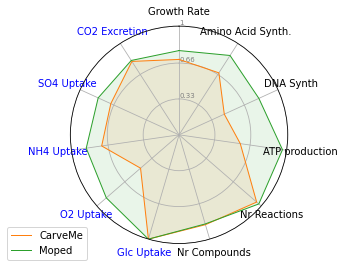

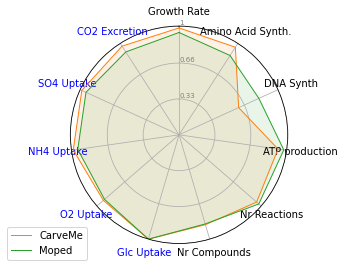

In [8]:
def plot_radar(df: pd.DataFrame, ax: plt.Axes | None = None) -> tuple[Figure, plt.Axes]:
    if ax is None:
        fig, ax = plt.subplots(1, 1, subplot_kw={"polar": True}, figsize=(12, 4))
    else:
        fig = ax.get_figure()
    categories = df.columns
    N = len(categories)
    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    # Initialise the spider plot
    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    # Draw one axe per variable + add labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)

    exchanges = ["Glc Uptake", "O2 Uptake", "NH4 Uptake", "SO4 Uptake", "CO2 Excretion"]

    for ticklabel in list(plt.gca().get_xticklabels()):
        for j in list(exchanges):
            if j in str(ticklabel):
                ticklabel.set_color("b")

    # Draw ylabels
    ax.set_rlabel_position(0)
    ax.set_yticks([0.33, 0.66, 1])
    ax.set_yticklabels(["0.33", "0.66", "1"], color="grey", size=7)
    ax.set_ylim(0, 1.0)

    # Ind1
    values = df.iloc[0].values.flatten().tolist()
    values += values[:1]  # to close the plot
    ax.plot(angles, values, linewidth=1, linestyle="solid", label="CarveMe", color="C1")
    ax.fill(angles, values, "C1", alpha=0.1)

    # Ind2
    values = df.iloc[1].values.flatten().tolist()
    values += values[:1]  # to close the plot
    ax.plot(angles, values, linewidth=1, linestyle="solid", label="Moped", color="C2")
    ax.fill(angles, values, "C2", alpha=0.1)

    # Add legend
    ax.legend(loc="upper right", bbox_to_anchor=(0.1, 0.1))
    return fig, ax


fig, ax = plot_radar(df_original)
plt.savefig("../figures/radar_plots_unchanged.pdf", bbox_inches="tight")


fig, ax = plot_radar(df_same)
plt.savefig("../figures/radar_plots_similar.pdf", bbox_inches="tight")
